In [155]:
from bs4 import BeautifulSoup, Comment
import urllib.request
import re
import pandas as pd

url='https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'

soup = BeautifulSoup(urllib.request.urlopen(url), 'html5lib')

nowe = soup.find('table', class_='min_width')
lista_proby = []
lista_udane = []
lista_procent = []
imiona = []
imiona1 = []
i = 0
for row in nowe.tbody.find_all('tr'):    
    columns = row.find_all('td')
    if columns != []:
        imie = columns[0].text.strip()
        liga = columns[4].text.strip()
        wiek = columns[5].text.strip()
        proby = columns[15].text.strip()
        udane = columns[16].text.strip()
        procent = columns[17].text.strip()
        if proby != '' and udane != '' and procent != '':
            imiona.append(imie)
            lista_proby.append([("Imie",imie),("Liga",liga),("Proby",int(proby)),("Wiek",wiek)])
            lista_udane.append([("Imie",imie),("Liga",liga),("Udane",int(udane))])
            lista_procent.append([("Imie",imie),("Liga",liga),("Procent",float(procent))])
print(lista_proby)

[[('Imie', 'Max Aarons'), ('Liga', 'eng Premier League'), ('Proby', 32), ('Wiek', '24-122')], [('Imie', 'Brenden Aaronson'), ('Liga', 'de Bundesliga'), ('Proby', 60), ('Wiek', '23-196')], [('Imie', 'Paxten Aaronson'), ('Liga', 'de Bundesliga'), ('Proby', 7), ('Wiek', '20-253')], [('Imie', 'Yunis Abdelhamid'), ('Liga', 'fr Ligue 1'), ('Proby', 15), ('Wiek', '36-220')], [('Imie', 'Salis Abdul Samed'), ('Liga', 'fr Ligue 1'), ('Proby', 19), ('Wiek', '24-040')], [('Imie', 'Laurent Abergel'), ('Liga', 'fr Ligue 1'), ('Proby', 63), ('Wiek', '31-094')], [('Imie', 'Matthis Abline'), ('Liga', 'fr Ligue 1'), ('Proby', 27), ('Wiek', '21-038')], [('Imie', 'Abner'), ('Liga', 'es La Liga'), ('Proby', 13), ('Wiek', '23-344')], [('Imie', 'Zakaria Aboukhlal'), ('Liga', 'fr Ligue 1'), ('Proby', 30), ('Wiek', '24-077')], [('Imie', 'Abdel Abqar'), ('Liga', 'es La Liga'), ('Proby', 5), ('Wiek', '25-056')], [('Imie', 'Tammy Abraham'), ('Liga', 'it Serie A'), ('Proby', 3), ('Wiek', '26-216')], [('Imie', 'Fra

In [156]:
ostateczna = []

In [157]:
print(imiona)
print(len(imiona))
vitinha = 0
for i in imiona:
    if i not in imiona1 or i=='Rodri' or i=='Juan Cruz' or i=='Danilo' or i=='Marquinhos' or i=='Stefan Mitrović':
        imiona1.append(i)
    elif i=='Vitinha' and vitinha<1:
        imiona1.append(i)
        vitinha+=1
print(imiona1)
lista_proby_1 = []
lista_udane_1 = []
lista_procent_1 = []
for i in range(len(lista_proby)):
    if i != len(lista_proby)-1:
        if lista_proby[i][0]==lista_proby[i+1][0]:
            if lista_proby[i][3] == lista_proby[i+1][3]:
                lista_proby_1.append([lista_proby[i][0],lista_proby[i][1],("Proby",lista_proby[i][2][1]+lista_proby[i+1][2][1])])
                lista_procent_1.append([lista_procent[i][0],lista_procent[i][1],("Procent",round(100*(lista_udane[i][2][1]+lista_udane[i+1][2][1])/(lista_proby[i][2][1]+lista_proby[i+1][2][1]),1))])
            else:
                if lista_proby[i][0][1]=='Vitinha':
                    lista_proby_1.append(lista_proby[i+1])
                    lista_procent_1.append(lista_procent[i+1])
                else:
                    lista_proby_1.append(lista_proby[i])
                    lista_procent_1.append(lista_procent[i])
            imiona1=imiona1[1:]
        else:
            if lista_proby[i][0][1] in imiona1:
                lista_proby_1.append(lista_proby[i])
                lista_procent_1.append(lista_procent[i])
                imiona1=imiona1[1:]
    else:
        if lista_proby[i][0][1] in imiona1:
            lista_proby_1.append(lista_proby[i])
            lista_procent_1.append(lista_procent[i])
            imiona1=imiona1[1:]
imionka = []
for x in lista_proby_1:
    if x[2][1]>=36:
        imionka.append(x[0][1])
for y in lista_procent_1:
    if y[0][1] in imionka:
        ostateczna.append(y)
print(ostateczna)

['Max Aarons', 'Brenden Aaronson', 'Paxten Aaronson', 'Yunis Abdelhamid', 'Salis Abdul Samed', 'Laurent Abergel', 'Matthis Abline', 'Abner', 'Zakaria Aboukhlal', 'Abdel Abqar', 'Tammy Abraham', 'Francesco Acerbi', 'Marcos Acuña', 'Bénie Adama Traore', 'Bénie Adama Traore', 'Akor Adams', 'Tyler Adams', 'Junior Adamu', 'Sargis Adamyan', 'Tosin Adarabioyo', 'Elijah Adebayo', 'Karim Adeyemi', 'Simon Adingra', 'Nathaniel Adjei', 'Amine Adli', 'Yacine Adli', 'Adson', 'Michel Aebischer', 'Emmanuel Agbadou', 'Lucien Agoume', 'Felix Agu', 'Nayef Aguerd', 'Ruben Aguilar', 'Naouirou Ahamada', 'Anel Ahmedhodžić', 'Joseph Aidoo', 'Ola Aina', 'Rayan Aït-Nouri', 'Tosin Aiyegun', 'Kristoffer Ajer', 'Ludovic Ajorque', 'Manuel Akanji', 'Nathan Aké', 'Ilias Akhomach', 'Sergio Akieme', 'Sergio Akieme', 'Maghnes Akliouche', 'Paul Akouokou', 'Jean-Daniel Akpa-Akpro', 'Kevin Akpoguma', 'Luis Alberto', 'Carlos Alcaraz', 'Rubén Alcaraz', 'Omar Alderete', 'Iván Alejo', 'Carles Aleñá', 'Trent Alexander-Arnold', 

In [158]:
url_1='https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats'

soup_1 = BeautifulSoup(urllib.request.urlopen(url_1), 'html5lib')

nowe_1 = soup_1.find('table', class_='min_width')
lista_progresywne = []
for row_1 in nowe_1.tbody.find_all('tr'):    
    columns_1 = row_1.find_all('td')
    if columns_1 != []:
        imie_1 = columns_1[0].text.strip()
        wiek_1 = columns_1[5].text.strip()
        progresywne = columns_1[24].text.strip()
        if imie_1 in imionka:
            lista_progresywne.append((imie_1,int(progresywne),wiek_1))
print(lista_progresywne)


[('Brenden Aaronson', 43, '23-196'), ('Laurent Abergel', 178, '31-094'), ('Bénie Adama Traore', 9, '21-157'), ('Bénie Adama Traore', 10, '21-157'), ('Akor Adams', 17, '24-097'), ('Elijah Adebayo', 20, '26-119'), ('Karim Adeyemi', 22, '22-108'), ('Simon Adingra', 43, '22-125'), ('Ola Aina', 58, '27-210'), ('Rayan Aït-Nouri', 93, '22-334'), ('Ilias Akhomach', 34, '20-019'), ('Sergio Akieme', 28, '26-141'), ('Sergio Akieme', 15, '26-141'), ('Maghnes Akliouche', 92, '22-070'), ('Luis Alberto', 212, '31-220'), ('Iván Alejo', 30, '29-085'), ('Trent Alexander-Arnold', 184, '25-211'), ('Mohamed Ali Cho', 3, '20-107'), ('Mohamed Ali Cho', 20, '20-107'), ('Faride Alidou', 33, '22-292'), ('Nabil Alioui', 43, '25-077'), ('Jim Allevinah', 51, '29-068'), ('Miguel Almirón', 75, '30-085'), ('Pontus Almqvist', 29, '24-300'), ('Edson Álvarez', 89, '26-194'), ('Julián Álvarez', 103, '24-095'), ('Papa Amadou Diallo', 28, '19-315'), ('Selim Amallah', 21, '27-172'), ('Zeki Amdouni', 47, '23-153'), ('Nadiem 

In [159]:
lista_progresywne_1 = []
imionka1 = imionka
print(imionka1)
for i in range(len(lista_progresywne)):
    if i != len(lista_progresywne)-1:
        if lista_progresywne[i][0]==lista_progresywne[i+1][0]:
            if lista_progresywne[i][2] == lista_progresywne[i+1][2]:
                lista_progresywne_1.append((lista_progresywne[i][0],lista_progresywne[i][1]+lista_progresywne[i+1][1]))
            else:
                lista_progresywne_1.append((lista_progresywne[i][0],lista_progresywne[i][1]))
            imionka1=imionka1[1:]
        else:
            if lista_progresywne[i][0] in imionka1:
                lista_progresywne_1.append((lista_progresywne[i][0],lista_progresywne[i][1]))
                imionka1=imionka1[1:]
    else:
        if lista_progresywne[i][0] in imionka1:
            lista_progresywne_1.append((lista_progresywne[i][0],lista_progresywne[i][1]))
            imionka1=imionka1[1:]
print(len(lista_progresywne_1))

['Brenden Aaronson', 'Laurent Abergel', 'Bénie Adama Traore', 'Akor Adams', 'Elijah Adebayo', 'Karim Adeyemi', 'Simon Adingra', 'Ola Aina', 'Rayan Aït-Nouri', 'Ilias Akhomach', 'Sergio Akieme', 'Maghnes Akliouche', 'Luis Alberto', 'Iván Alejo', 'Trent Alexander-Arnold', 'Mohamed Ali Cho', 'Faride Alidou', 'Nabil Alioui', 'Jim Allevinah', 'Miguel Almirón', 'Pontus Almqvist', 'Edson Álvarez', 'Julián Álvarez', 'Papa Amadou Diallo', 'Selim Amallah', 'Zeki Amdouni', 'Nadiem Amiri', 'Felipe Anderson', 'Michail Antonio', 'Antony', 'Cameron Archer', 'Jesús Areso', 'Sergio Arribas', 'Iago Aspas', 'Lorenz Assignon', 'Jordan Ayew', 'Neil El Aynaoui', 'Matthias Bader', 'Alex Baena', 'Leon Bailey', 'Dilane Bakwa', 'Tommaso Baldanzi', 'Alejandro Balde', 'Folarin Balogun', 'Jonathan Bamba', 'Lameck Banda', 'Bradley Barcola', 'Melvin Bard', 'Nicolò Barella', 'Ross Barkley', 'Ander Barrenetxea', 'Pablo Barrios', 'Ihlas Bebou', 'Maximilian Beier', 'Raoul Bellanova', 'Jean-Ricner Bellegarde', 'Héctor Be

In [213]:
def kolory(lista):
    kolorki = []
    for c in lista:
        if c[1][1]=='de Bundesliga':
            kolorki.append('#330000')
        elif c[1][1]=='fr Ligue 1':
            kolorki.append('#0000ff')
        elif c[1][1]=='eng Premier League':
            kolorki.append('#ff0000')
        elif c[1][1]=='es La Liga':
            kolorki.append('#ffff00')
        else:
            kolorki.append('#009900')
    return kolorki

In [209]:
ostateczna_1 = ostateczna

In [214]:
for i in range(len(ostateczna)):
    ostateczna_1[i].append(('Progresywne',lista_progresywne_1[i][1]))
print(ostateczna_1)
progresywne = [x[3][1] for x in ostateczna]
print(progresywne)
sr_progresywne = [sum(progresywne)/len(progresywne) for x in range(len(progresywne))]
procent = [x[2][1] for x in ostateczna]
print(procent)
sr_procent = [sum(procent)/len(procent) for x in range(len(procent))]
kolorki= kolory(ostateczna)
print(kolorki)



[[('Imie', 'Brenden Aaronson'), ('Liga', 'de Bundesliga'), ('Procent', 40.0), ('Progresywne', 43), ('Progresywne', 43), ('Progresywne', 43), ('Progresywne', 43), ('Progresywne', 43), ('Progresywne', 43), ('Progresywne', 43), ('Progresywne', 43), ('Progresywne', 43), ('Progresywne', 43), ('Progresywne', 43)], [('Imie', 'Laurent Abergel'), ('Liga', 'fr Ligue 1'), ('Procent', 69.8), ('Progresywne', 178), ('Progresywne', 178), ('Progresywne', 178), ('Progresywne', 178), ('Progresywne', 178), ('Progresywne', 178), ('Progresywne', 178), ('Progresywne', 178), ('Progresywne', 178), ('Progresywne', 178), ('Progresywne', 178)], [('Imie', 'Bénie Adama Traore'), ('Liga', 'eng Premier League'), ('Procent', 35.9), ('Progresywne', 19), ('Progresywne', 19), ('Progresywne', 19), ('Progresywne', 19), ('Progresywne', 19), ('Progresywne', 19), ('Progresywne', 19), ('Progresywne', 19), ('Progresywne', 19), ('Progresywne', 19), ('Progresywne', 19)], [('Imie', 'Akor Adams'), ('Liga', 'fr Ligue 1'), ('Procent

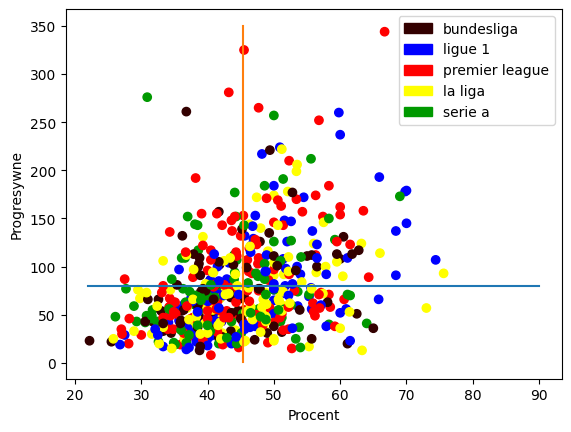

In [215]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
legend_dict = { 'bundesliga' : '#330000', 'ligue 1' : '#0000ff', 'premier league' : '#ff0000' , 'la liga':'#ffff00', 'serie a': '#009900'}
xs = np.linspace(22,90,525)
ys = np.linspace(1,350,525)
fig,ax = plt.subplots()
ax.scatter(procent,progresywne,c=kolorki)
ax.plot(xs,sr_progresywne)
ax.plot(sr_procent,ys)
ax.set_xlabel("Procent")
ax.set_ylabel("Progresywne")
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
plt.show()